# Gradient descent with backtracking line-search

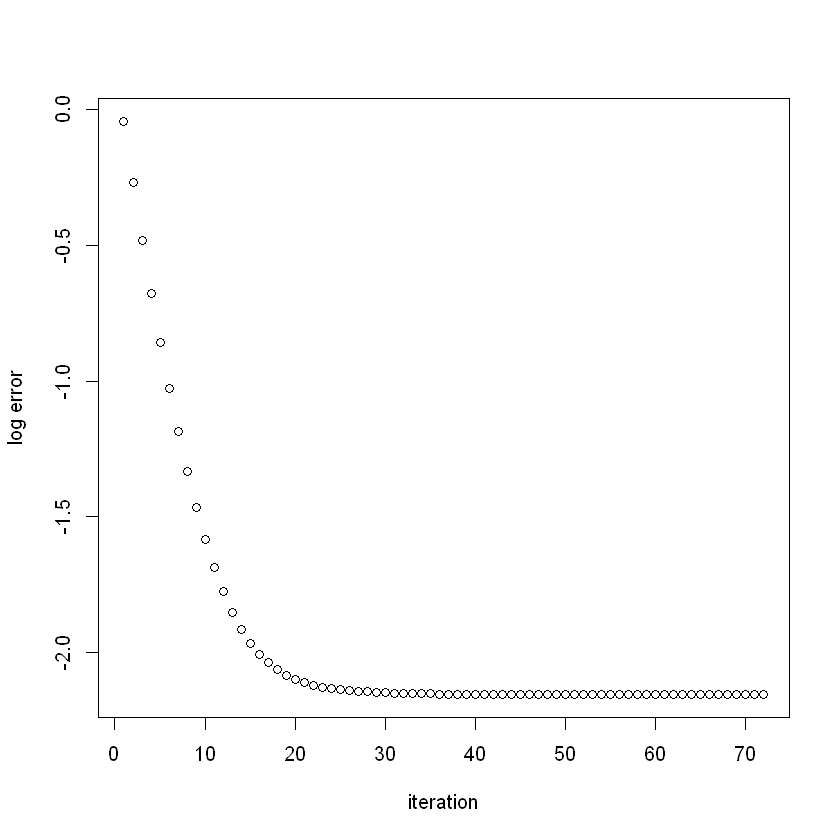

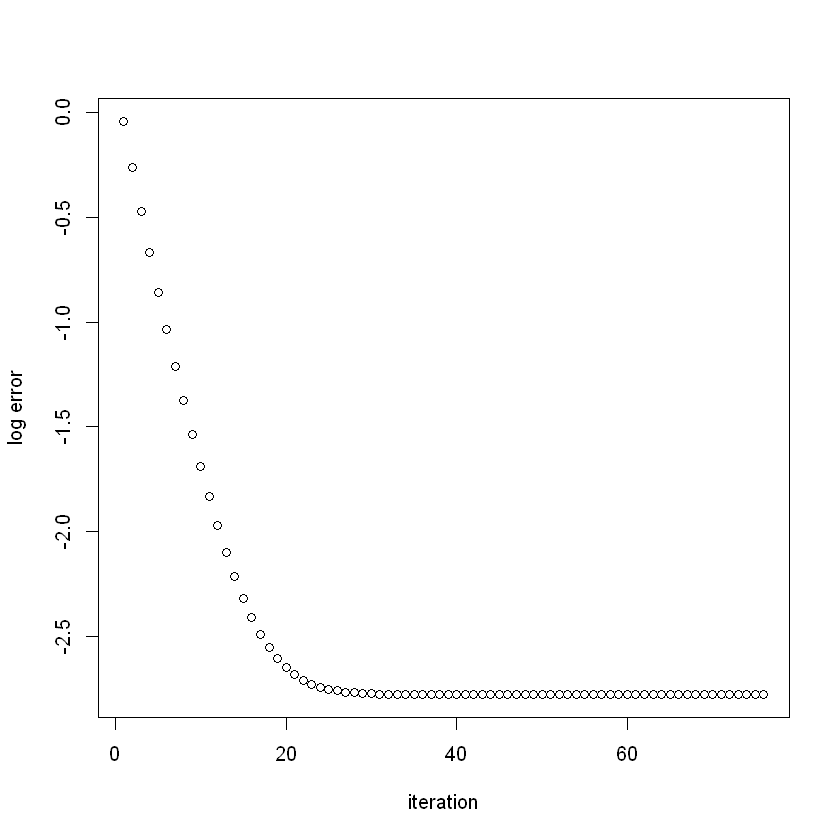

In [2]:
# Helpers
norm <- function(vec) {return(sqrt(sum(vec^2)))}
sigmoid <- function(z){return(1/(1+exp(-z)))}

# Optimizer
backtrack <- function(f, df, x, eta, k) 
{
    i <- 1
    alpha <- c(1)
    grad <- df(x)
    search_vec <- -grad
    t <- -k * t(search_vec)%*%grad
    while (f(x)-f(x+alpha[i]*search_vec)<alpha[i]*t)
    {
        alpha <- c(alpha, eta*alpha[i])
        i <- i+1
    }
    return(tail(alpha, 1))
}

armijo_gd <- function(f, df, x, y, t=0.2, eta=0.1, k=0.3, tol=10^-6)
{
    i <- 1
    error <- c(100)
    error2 <- c()
    while(tail(error,1)>tol)
    {
        x_prev <- x
        x <- x-t*df(x)
        error2 <- c(error2, log(norm(x-y)))
        t <- backtrack(f, df, x, eta, k)
        i <- i+1
        error <- c(error, norm(df(x)))
    }
    return (list('min_val'=x, 'error_vector'=error[-1], 'requested_error_vector'=error2))
}

# Logistic regression model
loss <- function(y, s){return(mean(-y*log(s)-(1-y)*log(1-s)))} 

fit <- function(X, y, lr=0.1, tol=10^-6)
{
    d <- length(X[, 1])
    beta <- rep(0, d)
    f <- function(beta_){return(loss(y, sigmoid(t(X)%*%beta_)))}
    df <- function(beta_){return(X%*%(sigmoid(t(X)%*%beta_)-y)/length(y))}
    return(armijo_gd(f, df, beta, rep(1/sqrt(d), d), eta=lr, tol=tol))
}

# Plots for part c

plot_log_error <- function(n, d)
{
    x <- matrix(rnorm(n*d), nrow=d)
    y <- matrix(rbinom(n=n,prob=sigmoid(t(x)%*%rep(1/sqrt(d), d)), size=1))
    result <- fit(x, y)
    plot(result[[3]], xlab="iteration", ylab='log error')
}

plot_log_error(2000, 5)

plot_log_error(5000, 5)